![Title Image](https://user-images.githubusercontent.com/147800579/276565795-5cc5a12e-0043-4773-b67c-65ed34cbbbbe.PNG)
    
## Recommendations for Movie Production for Microsoft

Author: Shimnaz Fathima

Welcome to the Project Analysis done by Shimnaz Fathima! 
You will find a brief overview of the project, the findings and the recommendations derived after the completion of this project here. 

## Project Overview
This project involves using various avaiable movie related databases to perform data analysis and derive meaningful insights and recommendations for Microsoft for their new venture to create a new movie studio.

## Business Problem
Microsoft as a new entrant in the movie production space, requires expert recommendation in this area. This project looks into catering to this problem and doing analysis of the different movie related attributes and develop findings related to these. These findings will be converted into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.

## The Data
In the folder zippedData are movie datasets from:

+ Box Office Mojo
+ IMDB
+ Rotten Tomatoes
+ TheMovieDB
+ The Numbers

This project will be looking into the following datasets from the above listed ones:

+ imdb.title.basics
+ imdb.title.ratings
+ imdb.title.principals
+ mdb.name.basics
+ bom.movie_gross

I have used them to find the insights of recommended runtimes, best studios and recommended actors to be associated with.

In [354]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df1=pd.read_csv('zippedData/bom.movie_gross.csv.gz')
df1

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [4]:
df1.rename(columns={'title': 'primary_title'}, inplace=True)
df1=df1.drop(['year'],axis=1)
df1.head()

,primary_title,studio,domestic_gross,foreign_gross
0,Toy Story 3,BV,415000000.0,652000000
1,Alice in Wonderland (2010),BV,334200000.0,691300000
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000
3,Inception,WB,292600000.0,535700000
4,Shrek Forever After,P/DW,238700000.0,513900000


In [5]:
df2=pd.read_csv('zippedData/imdb.title.ratings.csv.gz')
#df2=df2.drop('numvotes',axis=1)
df2.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [6]:
df3=pd.read_csv('zippedData/imdb.title.basics.csv.gz')
#df3=df3.drop(['original_title','start_year','runtime_minutes','genres'], axis=1)
df3.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [7]:
df4=pd.merge(df2,df3)
df4.head()

,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt10356526,8.3,31,Laiye Je Yaarian,Laiye Je Yaarian,2019,117.0,Romance
1,tt10384606,8.9,559,Borderless,Borderless,2019,87.0,Documentary
2,tt1042974,6.4,20,Just Inès,Just Inès,2010,90.0,Drama
3,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy"
4,tt1060240,6.5,21,Até Onde?,Até Onde?,2011,73.0,"Mystery,Thriller"


In [171]:
rv_analysis=df4.drop(['tconst','averagerating','primary_title','original_title','start_year','genres'], axis=1)
rv_analysis.dropna(inplace=True)
rv_analysis.sort_values(by='runtime_minutes',ignore_index=True,inplace=True)
rv_analysis=rv_analysis.reindex(columns=["runtime_minutes","numvotes"])
rv_analysis
#rv_analysis.to_csv(index=False)

,runtime_minutes,numvotes
0,3.0,5
1,3.0,10
2,3.0,8
3,4.0,6
4,4.0,5
...,...,...
66231,808.0,100
66232,1100.0,5
66233,1440.0,219
66234,14400.0,69


In [251]:
last=rv_analysis["runtime_minutes"].iloc[-1]
a=np.arange(0,(((last/10)+1)*10),10)
b=a[1:-1]
rv_analysis["bins"]=pd.cut(rv_analysis["runtime_minutes"],a,labels=np.arange(10,(((last/10)+1)*10),10))
rv=rv_analysis.groupby('bins',as_index=False)['numvotes'].mean().sort_values(by='bins',ignore_index=True)
rv["numvotes"]=rv["numvotes"].fillna(0)
rv["cumilative"]=rv["numvotes"]
rv

,bins,numvotes,cumilative
0,10.0,11.375000,11.375000
1,20.0,17.135135,17.135135
2,30.0,18.557522,18.557522
3,40.0,52.086957,52.086957
4,50.0,75.593724,75.593724
...,...,...,...
5137,51380.0,0.000000,0.000000
5138,51390.0,0.000000,0.000000
5139,51400.0,0.000000,0.000000
5140,51410.0,0.000000,0.000000


In [271]:
for i in rv.index:
    if i==0:
        rv.at[i,"cumilative"]=rv.loc[i,"numvotes"]
    else:
        rv.at[i,"cumilative"]=rv.loc[i-1,"cumilative"]+rv.loc[i,"numvotes"]

In [277]:
sum=rv["cumilative"].iloc[-1]
P25=0.25*sum
P50=0.5*sum
P75=0.75*sum
iP25=0
iP50=0
iP75=0
for i in rv.index:
    if i==0:
        continue
    elif rv.at[i-1,"cumilative"]<=P25 and rv.at[i,"cumilative"]>P25:
        iP25=i-1
    if i==0:
        continue
    elif rv.at[i-1,"cumilative"]<=P50 and rv.at[i,"cumilative"]>P50:
        iP50=i-1 
    if i==0:
        continue
    elif rv.at[i-1,"cumilative"]<=P75 and rv.at[i,"cumilative"]>P75:
        iP75=i-1  

In [278]:
rv.loc[iP25,'bins']


130.0

In [279]:
rv.loc[iP50,'bins']

160.0

In [280]:
rv.loc[iP75,'bins']

190.0

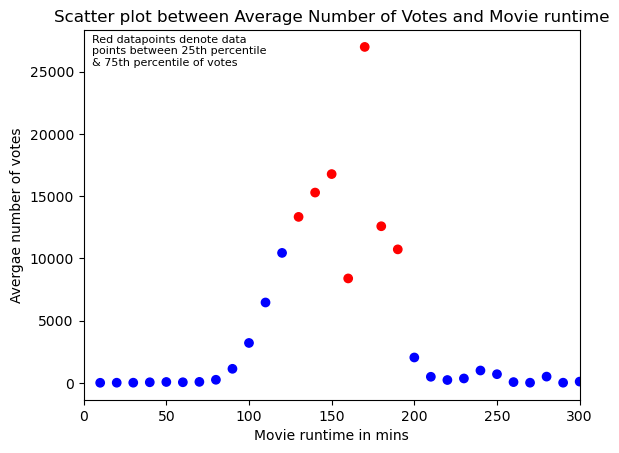

In [314]:
x=rv.loc[:,'bins']
y=rv.loc[:,'numvotes']
colors = ['red' if 130 <= value <= 190 else 'blue' for value in x]
plt.scatter(x, y, c=colors)
plt.xlim(0, 300)
plt.title("Scatter plot between Average Number of Votes and Movie runtime")
plt.xlabel("Movie runtime in mins")
plt.ylabel("Avergae number of votes")
side_text = "Red datapoints denote data\npoints between 25th percentile \n& 75th percentile of votes"
side_x = 5 # Adjust the x-coordinate
side_y = 25500  # Adjust the y-coordinate
plt.text(side_x, side_y, side_text, fontsize=8, color='black')
plt.show()

In [12]:
df5=pd.merge(df4,df1)
df5

,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,studio,domestic_gross,foreign_gross
0,tt1043726,4.2,50352,The Legend of Hercules,The Legend of Hercules,2014,99.0,"Action,Adventure,Fantasy",LG/S,18800000.0,42400000
1,tt1171222,5.1,8296,Baggage Claim,Baggage Claim,2013,96.0,Comedy,FoxS,21600000.0,887000
2,tt1181840,7.0,5494,Jack and the Cuckoo-Clock Heart,Jack et la mécanique du coeur,2013,94.0,"Adventure,Animation,Drama",Shout!,NaN,3400000
3,tt1210166,7.6,326657,Moneyball,Moneyball,2011,133.0,"Biography,Drama,Sport",Sony,75600000.0,34600000
4,tt1212419,6.5,87288,Hereafter,Hereafter,2010,129.0,"Drama,Fantasy,Romance",WB,32700000.0,72500000
...,...,...,...,...,...,...,...,...,...,...,...
3022,tt3399916,6.3,4185,The Dead Lands,The Dead Lands,2014,107.0,"Action,Adventure",Magn.,5200.0,NaN
3023,tt3616916,6.7,28167,The Wave,Bølgen,2015,105.0,"Action,Drama,Thriller",Magn.,177000.0,NaN
3024,tt3748512,7.4,4977,Hitchcock/Truffaut,Hitchcock/Truffaut,2015,79.0,Documentary,Cohen,260000.0,NaN
3025,tt7008872,7.0,18768,Boy Erased,Boy Erased,2018,115.0,"Biography,Drama",Focus,6800000.0,5000000


In [13]:
rs_analysis =df5.groupby('studio',as_index=False)['averagerating'].mean().sort_values(by='averagerating', ascending=False,ignore_index=True)
rs_analysis.iloc[0:10,:]

,studio,averagerating
0,Trafalgar,8.8
1,NAV,8.7
2,GrtIndia,8.3
3,SHO,8.2
4,BSC,8.1
5,Pala.,8.1
6,PDA,8.0
7,App.,7.9
8,Good Deed,7.8
9,MUBI,7.7


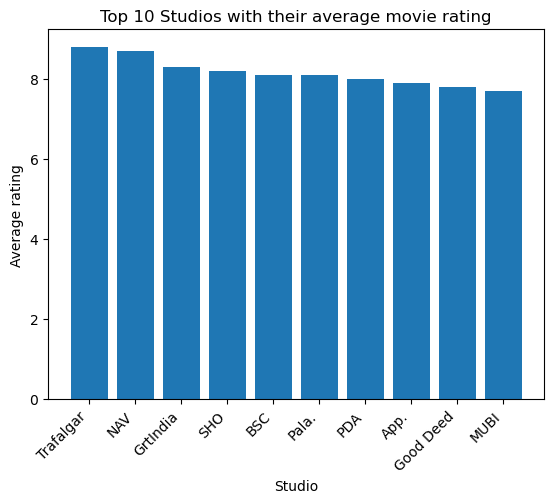

In [14]:
plt.bar(rs_analysis.iloc[0:10,0], rs_analysis.iloc[0:10,1])
plt.xlabel('Studio')
plt.ylabel('Average rating')
plt.title('Top 10 Studios with their average movie rating')
plt.xticks(rotation=45, ha="right")
plt.show()

In [15]:
df6=pd.read_csv('zippedData/imdb.title.principals.csv.gz')
df6=df6.drop(['ordering','job','characters'],axis=1)
df6.head()

,tconst,nconst,category
0,tt0111414,nm0246005,actor
1,tt0111414,nm0398271,director
2,tt0111414,nm3739909,producer
3,tt0323808,nm0059247,editor
4,tt0323808,nm3579312,actress


In [16]:
df6=df6.loc[df6['category'] == "actor"] 
df6.head()

,tconst,nconst,category
0,tt0111414,nm0246005,actor
5,tt0323808,nm2694680,actor
6,tt0323808,nm0574615,actor
14,tt0417610,nm0532721,actor
16,tt0417610,nm0069209,actor


In [17]:
df7=pd.read_csv('zippedData/imdb.name.basics.csv.gz')
df7=df7.drop(['birth_year','death_year','primary_profession','known_for_titles'],axis=1)
df7

,nconst,primary_name
0,nm0061671,Mary Ellen Bauder
1,nm0061865,Joseph Bauer
2,nm0062070,Bruce Baum
3,nm0062195,Axel Baumann
4,nm0062798,Pete Baxter
...,...,...
606643,nm9990381,Susan Grobes
606644,nm9990690,Joo Yeon So
606645,nm9991320,Madeline Smith
606646,nm9991786,Michelle Modigliani


In [18]:
df8=pd.merge(df7,df6)
df8

,nconst,primary_name,tconst,category
0,nm0062070,Bruce Baum,tt6463956,actor
1,nm0063198,Bayou,tt6579724,actor
2,nm0066093,Ahmad Bedair,tt1843163,actor
3,nm0066093,Ahmad Bedair,tt1805181,actor
4,nm0066093,Ahmad Bedair,tt2308899,actor
...,...,...,...,...
256556,nm9983906,Alejandro Odom,tt9010422,actor
256557,nm9985838,Anthony Simonetti,tt8028908,actor
256558,nm9989005,Jae-Hwan Kim,tt8733324,actor
256559,nm9989840,Mariya Shekaturova,tt5953804,actor


df9=pd.merge(df8,df5)
df9

In [141]:
ar_analysis=pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
ar_analysis.rename(columns={'movie': 'primary_title'}, inplace=True)
ar_analysis=ar_analysis.drop(['id','release_date','production_budget','domestic_gross'],axis=1)
ar_analysis

,primary_title,worldwide_gross
0,Avatar,"$2,776,345,279"
1,Pirates of the Caribbean: On Stranger Tides,"$1,045,663,875"
2,Dark Phoenix,"$149,762,350"
3,Avengers: Age of Ultron,"$1,403,013,963"
4,Star Wars Ep. VIII: The Last Jedi,"$1,316,721,747"
...,...,...
5777,Red 11,$0
5778,Following,"$240,495"
5779,Return to the Land of Wonders,"$1,338"
5780,A Plague So Pleasant,$0


In [142]:
ar_analysis.describe()

,primary_title,worldwide_gross
count,5782,5782
unique,5698,5356
top,Halloween,$0
freq,3,367


In [143]:
ar_analysis_combined=pd.merge(df9,ar_analysis)
ar_analysis_combined=ar_analysis_combined.drop(['numvotes','original_title','start_year','runtime_minutes','genres','studio'],axis=1)
ar_analysis_combined.dropna(inplace=True)
ar_analysis_combined['worldwide_gross'] = ar_analysis_combined['worldwide_gross'].str.replace('\D', '', regex=True)
ar_analysis_combined

,nconst,primary_name,tconst,category,averagerating,primary_title,domestic_gross,foreign_gross,worldwide_gross
0,nm0093589,Matt Bomer,tt2268016,actor,5.6,Magic Mike XXL,66000000.0,56500000,123660597
1,nm0542133,Joe Manganiello,tt2268016,actor,5.6,Magic Mike XXL,66000000.0,56500000,123660597
2,nm0735226,Adam Rodriguez,tt2268016,actor,5.6,Magic Mike XXL,66000000.0,56500000,123660597
3,nm1475594,Channing Tatum,tt2268016,actor,5.6,Magic Mike XXL,66000000.0,56500000,123660597
4,nm0093589,Matt Bomer,tt3799694,actor,7.4,The Nice Guys,36300000.0,26500000,59596747
...,...,...,...,...,...,...,...,...,...
3447,nm8301458,Misha Nesterov,tt5897302,actor,5.9,Slender Man,30600000.0,21200000,51723644
3448,nm8301459,Leonid Zaiko,tt5897302,actor,5.9,Slender Man,30600000.0,21200000,51723644
3449,nm6018521,Colin Woodell,tt4761916,actor,5.9,Unfriended: Dark Web,8900000.0,6300000,16434588
3451,nm6907855,Noah Schnapp,tt2452042,actor,7.1,The Peanuts Movie,130199999.0,116100000,250091610


In [144]:
ar_analysis_combined.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 3002 entries, 0 to 3452
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   nconst           3002 non-null   object 
 1   primary_name     3002 non-null   object 
 2   tconst           3002 non-null   object 
 3   category         3002 non-null   object 
 4   averagerating    3002 non-null   float64
 5   primary_title    3002 non-null   object 
 6   domestic_gross   3002 non-null   float64
 7   foreign_gross    3002 non-null   object 
 8   worldwide_gross  3002 non-null   object 
dtypes: float64(2), object(7)
memory usage: 234.5+ KB


In [145]:
ar_analysis_combined['worldwide_gross'] = pd.to_numeric(ar_analysis_combined['worldwide_gross'], errors='coerce')
ar_analysis_combined['foreign_gross'] = pd.to_numeric(ar_analysis_combined['foreign_gross'], errors='coerce')


In [146]:
ar_analysis_worldwide=ar_analysis_combined.groupby('primary_name',as_index=False).agg({'worldwide_gross':'mean','domestic_gross':'mean','foreign_gross':'mean'}).sort_values(by='worldwide_gross', ascending=False,ignore_index=True)
ar_analysis_worldwide.set_index('primary_name',inplace=True)
ar_analysis_worldwide=ar_analysis_worldwide.iloc[0:10,:]
ar_analysis_worldwide

,worldwide_gross,domestic_gross,foreign_gross
primary_name,,,
Rafe Spall,1.305773e+09,417700000.0,891800000.0
Yiu-Wing Chan,1.272470e+09,400700000.0,875700000.0
Aarif Rahman,1.272470e+09,400700000.0,875700000.0
Kevin Zegers,1.272470e+09,400700000.0,875700000.0
Jonathan Groff,1.272470e+09,400700000.0,875700000.0
Ed Ackerman,1.272470e+09,400700000.0,875700000.0
Shawn Ashmore,1.272470e+09,400700000.0,875700000.0
Huck Milner,1.242521e+09,608600000.0,634200000.0
Craig T. Nelson,1.242521e+09,608600000.0,634200000.0


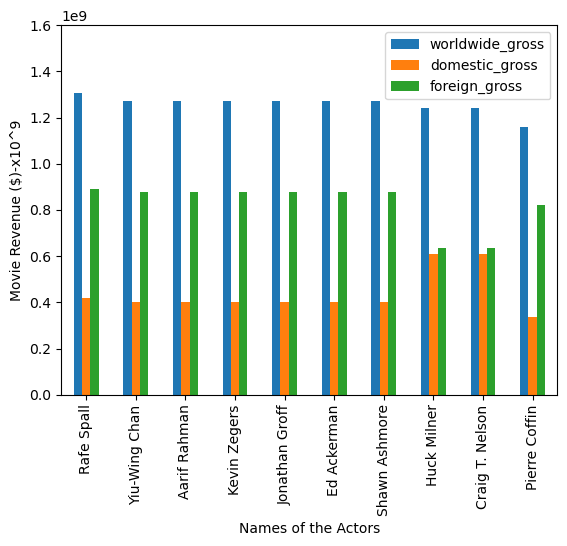

In [353]:
ar_analysis_worldwide.plot(kind="bar")
plt.xlabel('Names of the Actors')
plt.ylabel('Movie Revenue ($)-x10^9')
plt.ylim(0,1600000000)
#plt.gcf().set_size_inches(5, 2)
plt.show()

In [148]:
ar_analysis_domestic=ar_analysis_combined.groupby('primary_name',as_index=False).agg({'worldwide_gross':'mean','domestic_gross':'mean','foreign_gross':'mean'}).sort_values(by='domestic_gross', ascending=False,ignore_index=True)
ar_analysis_domestic.set_index('primary_name',inplace=True)
ar_analysis_domestic=ar_analysis_domestic.iloc[0:10,:]
ar_analysis_domestic

,worldwide_gross,domestic_gross,foreign_gross
primary_name,,,
Craig T. Nelson,1.242521e+09,608600000.0,634200000.0
Huck Milner,1.242521e+09,608600000.0,634200000.0
Diego Luna,1.049103e+09,532200000.0,523900000.0
Alan Tudyk,1.049103e+09,532200000.0,523900000.0
Donnie Yen,1.049103e+09,532200000.0,523900000.0
Ed O'Neill,1.021215e+09,486300000.0,542300000.0
Albert Brooks,1.021215e+09,486300000.0,542300000.0
Rafe Spall,1.305773e+09,417700000.0,891800000.0
Tim Allen,1.068880e+09,415000000.0,652000000.0


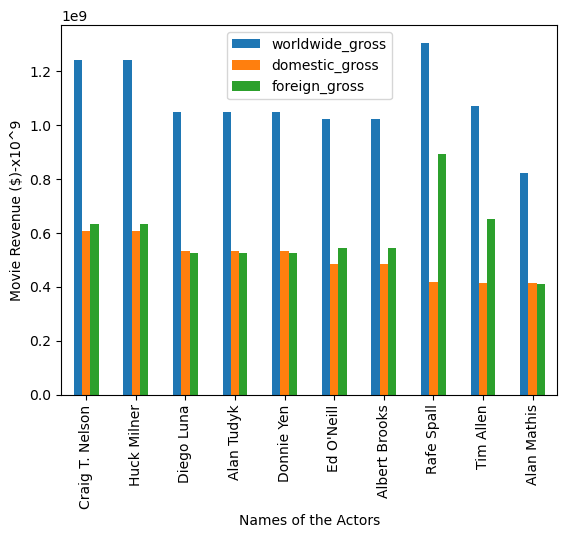

In [321]:
ar_analysis_domestic.plot(kind="bar")
plt.xlabel('Names of the Actors')
plt.ylabel('Movie Revenue ($)-x10^9')
plt.show()

## Conclusion and Recommendation

The following conclusions and recommendations can be derived from the results:

+ The movies with higher number of votes had a run time between 130 minutes and 190 minutes. Microsoft would be recommended to create a movie within this timeframe in order to attain the satisfaction of the audience.

+ The top ten studios that created movies with highest ratings were found out and these included studios like Trafalgar, NAV and GrtIndia. The client could look into their production style or associate with them for their first movie.

+ The top ten actors that acted in movies that bagged high revenue from across the world was found out and these included actors like Rafe Spall, Yiu-Wing Chan and Aarif Rahman.

+ For good revenue collection in the domestic market, the top ten actors that could be associated with were found out and they included actors like Craig T Nelson, Huck Milner and Diego Luna. Microsoft may considering associating with these actors based on the market segment they are interested in.